In [3]:
import pandas as pd

accident_csv = "./accident.csv"
person_csv = "./person.csv"
vehicle_csv = "./vehicle.csv"

accident_df = pd.read_csv(accident_csv)
person_df = pd.read_csv(person_csv)
vehicle_df = pd.read_csv(vehicle_csv)

C:\Users\ampma_qzhjfkx\AppData\Local\Temp\ipykernel_20308\2972132344.py:8: DtypeWarning: Columns (72,73,74,75,82,83,85,89,90,94) have mixed types. Specify dtype option on import or set low_memory=False.
  person_df = pd.read_csv(person_csv)
C:\Users\ampma_qzhjfkx\AppData\Local\Temp\ipykernel_20308\2972132344.py:9: DtypeWarning: Columns (102,103,104,107,108,109,110,117,118,120,125,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv(vehicle_csv)


In [4]:
accident_df["weather_lit"].value_counts()

weather_lit
Clear                1305
Unknown               221
Cloudy                167
Not Reported          120
Rain                   40
Snow                    3
Blowing Snow            1
Sleet or Hail           1
Severe Crosswinds       1
Other                   1
Name: count, dtype: int64

In [8]:
accident_df["lgt_cond_lit"].value_counts()

lgt_cond_lit
Daylight                   815
Dark - Not Lighted         336
Dark - Lighted             335
Unknown                    130
Dark - Unknown Lighting    128
Dusk                        64
Dawn                        46
Not Reported                 6
Name: count, dtype: int64

In [10]:
accident_df["a_tod_lit"].value_counts()

a_tod_lit
Nighttime    889
Daytime      872
Unknown       99
Name: count, dtype: int64

In [12]:
accident_df["a_spcra_lit"].value_counts()

a_spcra_lit
Other Crash                1223
Speeding Involved Crash     637
Name: count, dtype: int64

In [16]:
accident_df["a_ped_lit"].value_counts()

a_ped_lit
Other Crash                  1510
Pedestrian Involved Crash     350
Name: count, dtype: int64

In [18]:
accident_df["a_posbac_lit"].value_counts()

a_posbac_lit
Unknown BAC Crash                          878
All Drivers With ZERO BAC Testing Crash    517
Driver With Positive BAC Testing Crash     465
Name: count, dtype: int64

In [20]:
accident_df["a_dist_lit"].value_counts()

a_dist_lit
Other Crash                      1698
Involving a Distracted Driver     162
Name: count, dtype: int64

In [24]:
accident_df["HOUR"].value_counts()

HOUR
18    140
20    136
17    113
19    108
16    103
99     99
15     91
21     80
11     79
22     73
13     73
6      70
23     69
12     63
14     63
7      63
5      62
0      54
9      52
10     51
2      51
8      51
1      48
3      38
4      30
Name: count, dtype: int64

In [30]:
accident_df["TWAY_ID"].value_counts()

TWAY_ID
US-191                        48
UNKNOWN RD                    36
SR-87                         33
MCDOWELL RD                   33
SR-264                        29
                              ..
CAMINO DE OESTE                1
OUTER LOOP RD                  1
COUNTY 15TH ST                 1
LENZER AVE                     1
INDIAN ROUTE 121- ASPEN RD     1
Name: count, Length: 881, dtype: int64

In [32]:
accident_df["a_dow_lit"].value_counts()

a_dow_lit
Weekday    1001
Weekend     833
Unknown      26
Name: count, dtype: int64

In [34]:
accident_df["a_spcra_lit"].value_counts()

a_spcra_lit
Other Crash                1223
Speeding Involved Crash     637
Name: count, dtype: int64

In [26]:
accident_df

,index,accident_id,ST_CASE,VE_TOTAL,VE_FORMS,PEDS,PERSONS,COUNTY,county_name,CITY,...,A_POLPUR,a_polour_lit,A_POSBAC,a_posbac_lit,A_DIST,a_dist_lit,A_DROWSY,a_drowsy_lit,INDIAN_RES,indian_res_lit
0,0,2012040001,40001,1,1,0,1,19,PIMA,0,...,2,Other Crash,1,Driver With Positive BAC Testing Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
1,1,2012040002,40002,1,1,0,2,25,YAVAPAI,90,...,2,Other Crash,1,Driver With Positive BAC Testing Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
2,2,2012040003,40003,1,1,1,0,13,MARICOPA,370,...,2,Other Crash,2,All Drivers With ZERO BAC Testing Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
3,3,2012040004,40004,2,2,0,2,13,MARICOPA,190,...,2,Other Crash,2,All Drivers With ZERO BAC Testing Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
4,4,2012040005,40005,2,2,0,4,19,PIMA,530,...,2,Other Crash,3,Unknown BAC Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,1855,2016040872,40872,1,1,0,1,13,MARICOPA,0,...,2,Other Crash,2,All Drivers With ZERO BAC Testing Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
1856,1856,2016040875,40875,1,1,0,2,17,NAVAJO,0,...,2,Other Crash,2,All Drivers With ZERO BAC Testing Crash,2,Other Crash,2,Other Crash,1,Tribal Lands
1857,1857,2016040876,40876,1,1,1,1,13,MARICOPA,370,...,2,Other Crash,3,Unknown BAC Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
1858,1858,2016040877,40877,2,2,0,3,13,MARICOPA,200,...,2,Other Crash,3,Unknown BAC Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands


In [18]:
list(accident_df)

['index',
 'accident_id',
 'ST_CASE',
 'VE_TOTAL',
 'VE_FORMS',
 'PEDS',
 'PERSONS',
 'COUNTY',
 'county_name',
 'CITY',
 'city_name',
 'DAY',
 'MONTH',
 'YEAR',
 'HOUR',
 'MINUTE',
 'NHS',
 'FUNC_SYS',
 'func_sys_lit',
 'ROAD_FNC',
 'road_fnc_lit',
 'RD_OWNER',
 'rd_owner_lit',
 'TWAY_ID',
 'TWAY_ID2',
 'LATITUDE',
 'LONGITUD',
 'SP_JUR',
 'sp_jur_lit',
 'HARM_EV',
 'harm_ev_lit',
 'MAN_COLL',
 'man_coll_lit',
 'RELJCT1',
 'RELJCT2',
 'TYP_INT',
 'WRK_ZONE',
 'REL_ROAD',
 'LGT_COND',
 'lgt_cond_lit',
 'WEATHER',
 'weather_lit',
 'SCH_BUS',
 'CF1',
 'CF2',
 'CF3',
 'cf1_lit',
 'cf2_lit',
 'cf3_lit',
 'FATALS',
 'A_INTER',
 'a_inter_lit',
 'A_ROADFC',
 'a_road_fc_lit',
 'A_TOD',
 'a_tod_lit',
 'A_DOW',
 'a_dow_lit',
 'A_LT',
 'a_lt_lit',
 'A_SPCRA',
 'a_spcra_lit',
 'A_PED',
 'a_ped_lit',
 'A_PED_F',
 'a_ped_f_lit',
 'A_PEDAL',
 'a_pedal_lit',
 'A_PEDAL_F',
 'a_pedal_f_lit',
 'A_POLPUR',
 'a_polour_lit',
 'A_POSBAC',
 'a_posbac_lit',
 'A_DIST',
 'a_dist_lit',
 'A_DROWSY',
 'a_drowsy_lit

In [ ]:
# person_df

In [180]:
list(person_df)

['index',
 'accident_id',
 'STATE',
 'ST_CASE',
 'VE_FORMS',
 'VEH_NO',
 'PER_NO',
 'STR_VEH',
 'COUNTY',
 'DAY',
 'MONTH',
 'HOUR',
 'MINUTE',
 'RUR_URB',
 'FUNC_SYS',
 'HARM_EV',
 'MAN_COLL',
 'SCH_BUS',
 'MAKE',
 'MAK_MOD',
 'BODY_TYP',
 'MOD_YEAR',
 'TOW_VEH',
 'SPEC_USE',
 'EMER_USE',
 'ROLLOVER',
 'IMPACT1',
 'FIRE_EXP',
 'AGE',
 'SEX',
 'PER_TYP',
 'INJ_SEV',
 'SEAT_POS',
 'REST_USE',
 'REST_MIS',
 'AIR_BAG',
 'EJECTION',
 'EJ_PATH',
 'EXTRICAT',
 'DRINKING',
 'ALC_DET',
 'ALC_STATUS',
 'ATST_TYP',
 'ALC_RES',
 'DRUGS',
 'DRUG_DET',
 'DSTATUS',
 'DRUGTST1',
 'DRUGTST2',
 'DRUGTST3',
 'DRUGRES1',
 'DRUGRES2',
 'DRUGRES3',
 'HOSPITAL',
 'DOA',
 'DEATH_DA',
 'DEATH_MO',
 'DEATH_YR',
 'DEATH_HR',
 'DEATH_MN',
 'DEATH_TM',
 'LAG_HRS',
 'LAG_MINS',
 'P_SF1',
 'P_SF2',
 'P_SF3',
 'WORK_INJ',
 'HISPANIC',
 'RACE',
 'LOCATION',
 'ROAD_FNC',
 'CERT_NO',
 'VINTYPE',
 'VINMAKE',
 'VINA_MOD',
 'VIN_BT',
 'VINMODYR',
 'VIN_LNGT',
 'VIN_WGT',
 'WGTCD_TR',
 'WHLBS_LG',
 'WHLBS_SH',
 'SER_TR',
 

In [ ]:
# vehicle_df


In [ ]:
# list(vehicle_df)

In [40]:
accident_df["accident_id"].value_counts()

accident_id
2012040001    1
2015040298    1
2015040320    1
2015040318    1
2015040317    1
             ..
2013040450    1
2013040449    1
2013040446    1
2013040445    1
2016040880    1
Name: count, Length: 1860, dtype: int64

In [148]:
#Create new accident dataframe by creating a list
columns_to_select = ['accident_id','FATALS','a_spcra_lit','a_posbac_lit','a_drowsy_lit','a_dist_lit',
                     'PEDS','a_ped_f_lit']
plm_accident_df=accident_df[columns_to_select].copy()

# print(plm_accident_df.head(20))
plm_accident_df

,accident_id,FATALS,a_spcra_lit,a_posbac_lit,a_drowsy_lit,a_dist_lit,PEDS,a_ped_f_lit,a_pedal_f_lit
0,2012040001,1,Speeding Involved Crash,Driver With Positive BAC Testing Crash,Other Crash,Other Crash,0,Other Crash,Other Crash
1,2012040002,1,Speeding Involved Crash,Driver With Positive BAC Testing Crash,Other Crash,Other Crash,0,Other Crash,Other Crash
2,2012040003,1,Other Crash,All Drivers With ZERO BAC Testing Crash,Other Crash,Other Crash,1,Involving a pedestrian fatality,Other Crash
3,2012040004,1,Other Crash,All Drivers With ZERO BAC Testing Crash,Other Crash,Other Crash,0,Other Crash,Other Crash
4,2012040005,1,Speeding Involved Crash,Unknown BAC Crash,Other Crash,Other Crash,0,Other Crash,Other Crash
...,...,...,...,...,...,...,...,...,...
1855,2016040872,1,Other Crash,All Drivers With ZERO BAC Testing Crash,Other Crash,Other Crash,0,Other Crash,Other Crash
1856,2016040875,2,Other Crash,All Drivers With ZERO BAC Testing Crash,Other Crash,Other Crash,0,Other Crash,Other Crash
1857,2016040876,1,Other Crash,Unknown BAC Crash,Other Crash,Other Crash,1,Involving a pedestrian fatality,Other Crash
1858,2016040877,1,Other Crash,Unknown BAC Crash,Other Crash,Other Crash,0,Other Crash,Other Crash


In [156]:
# Count number of accidents with fatalities
accident_count=len(plm_accident_df['accident_id'].value_counts())
accident_count

1860

In [126]:
#Total the number of fatalaties
fatalities=plm_accident_df['FATALS'].sum()
fatalities

2039

In [146]:
# Filter and count speeding involved crash fatalities
speeding_df=plm_accident_df[plm_accident_df['a_spcra_lit'].str.contains('Speeding')]
speeding_count=len(speeding_df)
speeding_count

637

In [142]:
# Filter and count Positive BAC crash fatalities
positive_bac_df=plm_accident_df[plm_accident_df['a_posbac_lit'].str.contains('Positive BAC')]
positive_bac_count=len(positive_bac_df)
positive_bac_count 

465

In [152]:
# Filter and count drowsy driver crash fatalities
drowsy_driver_df=plm_accident_df[plm_accident_df['a_drowsy_lit'].str.contains('Drowsy')]
drowsy_driver_count=len(drowsy_driver_df)
drowsy_driver_count

25

In [154]:
# Filter and count distracted driver crash fatalities
distracted_driver_df=plm_accident_df[plm_accident_df['a_dist_lit'].str.contains('Distracted')]
distracted_driver_count=len(distracted_driver_df)
distracted_driver_count

162

In [170]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np

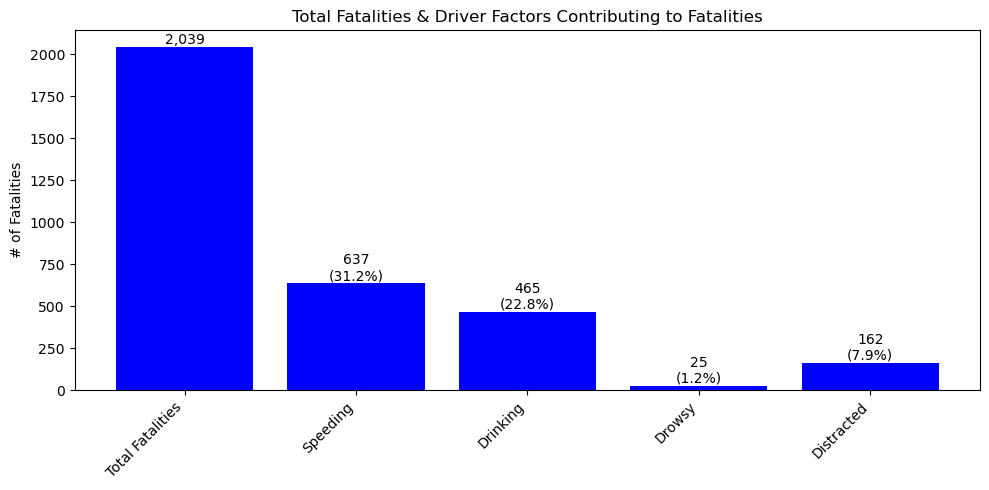

In [292]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
 
# Create bar chart
contributing_factors = ["Total Fatalities", "Speeding", "Drinking", "Drowsy", "Distracted"]
counts_for_contributing_factors = [2039, 637, 465, 25, 162]
x_axis = np.arange(len(counts_for_contributing_factors))
 
# Calculate percentages
total = counts_for_contributing_factors[0]
percentages = [count / total * 100 for count in counts_for_contributing_factors[1:]]
 
fig, ax = plt.subplots(figsize=(10, 5))
 
bars = ax.bar(x_axis, counts_for_contributing_factors, color="b", align="center")
 
# Add value labels on the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    if i == 0:
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,}',
                ha='center', va='bottom')
    else:
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,}\n({percentages[i-1]:.1f}%)',
                ha='center', va='bottom')
 
ax.set_xticks(x_axis)
ax.set_xticklabels(contributing_factors, rotation=45, ha='right')
 
ax.set_title("Total Fatalities & Driver Factors Contributing to Fatalities")
ax.set_ylabel("# of Fatalities")
 
plt.tight_layout()
plt.show()
 
# plt.savefig("output_data/Priscilla1.png")

In [ ]:
# # Create bar chart

# contributing_factors=["Total Fatalities","Speeding","Drinking","Drowsy","Distracted"]
# counts_for_contributing_factors=[2039,637,465,25,162]
# x_axis = np.arange(len(counts_for_contributing_factors))

# plt.bar(x_axis, counts_for_contributing_factors, color="b", align="center")
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, contributing_factors)

# plt.title("Total Fatalities & Driver Factors Contributing to Fatalities")
# Axes.bar_label(counts_for_contributing_factors, labels=None, fmt='%g', label_type='edge', padding=0)
# plt.ylabel("# of Fatalities")
# plt.show()

# # plt.savefig("output_data/Priscilla1.png")


In [258]:
# Create a DataFrame for percentage of fatalities
counts_contributing_factors = [637,465,25,162]
perct_contributing_factors_df = pd.DataFrame({'counts_contributing_factors': counts_contributing_factors})

perct_contributing_factors_df['Percentage'] = perct_contributing_factors_df['counts_contributing_factors'] / 2039*100
print(perct_contributing_factors_df)
# perct_contributing_factors_df

   counts_contributing_factors  Percentage
0                          637   31.240804
1                          465   22.805297
2                           25    1.226091
3                          162    7.945071


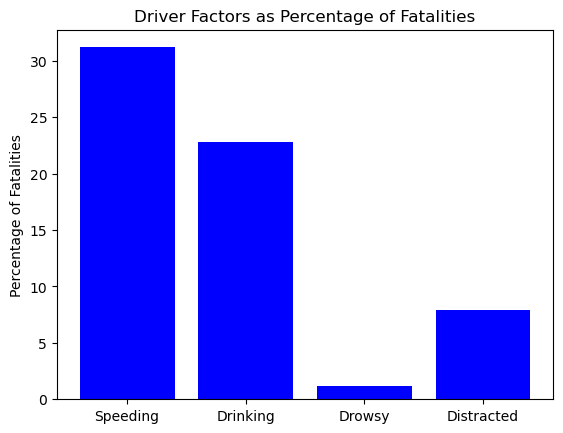

In [272]:
# Create bar chart for percentage of fatalities

contributing_factors=["Speeding","Drinking","Drowsy","Distracted"]
percent_of_fatalities=[31.2,22.8,1.2,7.9]
x_axis = np.arange(len(percent_of_fatalities))


plt.bar(x_axis, percent_of_fatalities, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, contributing_factors)

plt.title("Driver Factors as Percentage of Fatalities")
# Axes.bar_label(counts_for_contributing_factors, labels=None, fmt='%g', label_type='edge', padding=0)
plt.ylabel("Percentage of Fatalities")
plt.show()

# plt.savefig("output_data/Priscilla2.png")


In [196]:
# Filter and count pedestrian fatalities

ped_fatality_df=plm_accident_df[plm_accident_df['a_ped_f_lit'].str.contains('pedestrian fatality')]
ped_fatality_count=len(ped_fatality_df)
ped_fatality_count



347

In [212]:
# Filter and count driver speedingpedestrian fatalities
speed_ped_fatality_df = plm_accident_df[(plm_accident_df['a_ped_f_lit'].str.contains('pedestrian fatality')) & 
(plm_accident_df['a_spcra_lit'].str.contains('Speeding'))]

speed_ped_fatality_count=len(speed_ped_fatality_df)
speed_ped_fatality_count

16

In [208]:
# Filter and count driver drinking pedestrian fatalities
drink_ped_fatality_df = plm_accident_df[(plm_accident_df['a_ped_f_lit'].str.contains('pedestrian fatality')) & 
(plm_accident_df['a_posbac_lit'].str.contains('Positive BAC'))]

drink_ped_fatality_count=len(drink_ped_fatality_df)
drink_ped_fatality_count

25

In [216]:
# Filter and count driver drowsy pedestrian fatalities
drowsy_ped_fatality_df = plm_accident_df[(plm_accident_df['a_ped_f_lit'].str.contains('pedestrian fatality')) & 
(plm_accident_df['a_drowsy_lit'].str.contains('Drowsy'))]

drowsy_ped_fatality_count=len(drowsy_ped_fatality_df)
drowsy_ped_fatality_count

1

In [218]:
# Filter and count driver distracted pedestrian fatalities
distracted_ped_fatality_df = plm_accident_df[(plm_accident_df['a_ped_f_lit'].str.contains('pedestrian fatality')) & 
(plm_accident_df['a_dist_lit'].str.contains('Distracted'))]

distracted_ped_fatality_count=len(distracted_ped_fatality_df)
distracted_ped_fatality_count

31

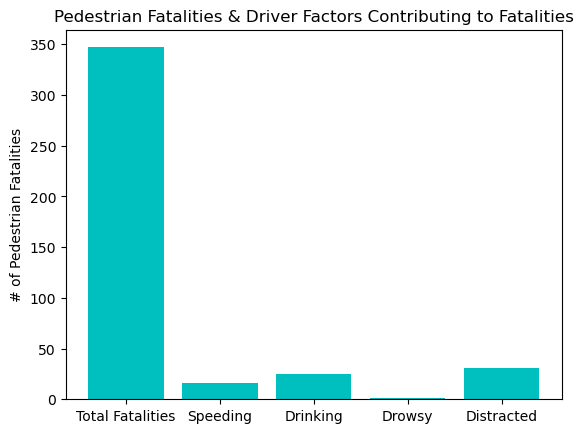

In [226]:
# Create bar chart for pedestrian fatalities

ped_contributing_factors=["Pedestrian Fatalities","Speeding","Drinking","Drowsy","Distracted"]
ped_counts_for_contributing_factors=[347,16,25,1,31]
x_axis = np.arange(len(ped_counts_for_contributing_factors))

plt.bar(x_axis, ped_counts_for_contributing_factors, color="c", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, contributing_factors)

plt.title("Pedestrian Fatalities & Driver Factors Contributing to Fatalities")

plt.ylabel("# of Pedestrian Fatalities")
plt.show()


In [276]:
# Create a DataFrame for percentage of pedestrian fatalities
ped_counts_for_contributing_factors=[16,25,1,31]
ped_perct_contributing_factors_df = pd.DataFrame({'ped_counts_for_contributing_factors': ped_counts_for_contributing_factors})

ped_perct_contributing_factors_df['Percentage'] = ped_perct_contributing_factors_df['ped_counts_for_contributing_factors'] / 347*100

print(ped_perct_contributing_factors_df)


   ped_counts_for_contributing_factors  Percentage
0                                   16    4.610951
1                                   25    7.204611
2                                    1    0.288184
3                                   31    8.933718


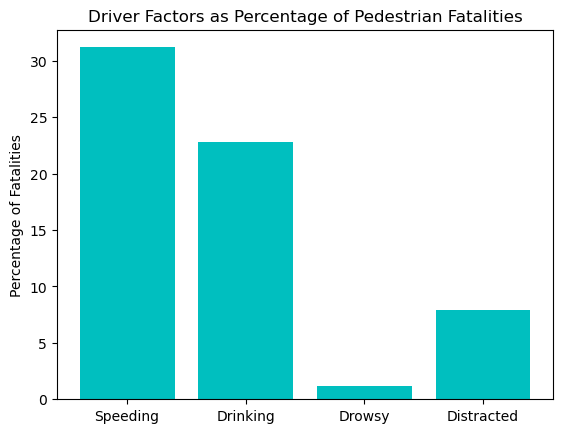

In [280]:
# Create bar chart for percentage of pedestrian fatalities

ped_contributing_factors=["Speeding","Drinking","Drowsy","Distracted"]
ped_percent_of_fatalities=[4.6,7.2,0.3,8.9]
x_axis = np.arange(len(percent_of_fatalities))


plt.bar(x_axis, percent_of_fatalities, color="c", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ped_contributing_factors)

plt.title("Driver Factors as Percentage of Pedestrian Fatalities")
# Axes.bar_label(counts_for_contributing_factors, labels=None, fmt='%g', label_type='edge', padding=0)
plt.ylabel("Percentage of Fatalities")
plt.show()

# plt.savefig("output_data/Priscilla4.png")